In [123]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
from scipy.stats import f as scist

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline

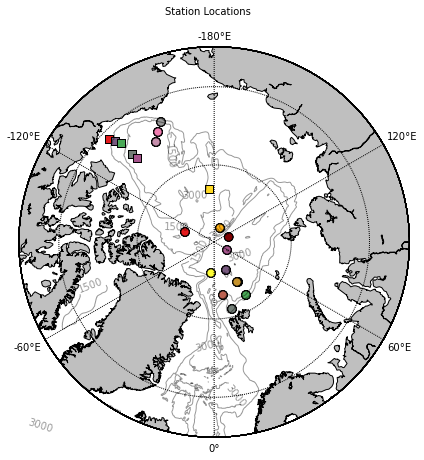

In [124]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1],latmax=90)

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
nc_filename_t=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/*r*.csv'))
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,c=cm.Set1(j*20),s=70)
    
for j in range(len(nc_filename_t)):
    data=pd.read_csv(nc_filename_t[j])
    lon = data['long.'];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,c=cm.Set1(j*20),s=70,marker='s')

#evaluation   
elat=np.array([83.114]) #     83°06.826 87°37.375 N  
elon=np.array([-174.88]) #   174°52.689W 156°05.581 E
e_lon,e_lat = m(elon,elat)
m.scatter(e_lon,e_lat,marker='s',c=cm.Set1(j*30),s=70)

url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

axm = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(axm, fontsize=10, inline=1,fmt = '%1.0f')

plt.suptitle("Station Locations")

plt.show()

In [125]:
import netCDF4 as nc

In [178]:
nc_filename = sorted(glob.glob('/ocean/xiaoxiny/research/data/total/t*.csv'))
nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Pa/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))



filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*T200201-200712*.nc'))
ptrc=nc.Dataset(filename[0])
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

found *.csv file: 
['/ocean/xiaoxiny/research/data/total/total70.csv', '/ocean/xiaoxiny/research/data/total/total73.csv', '/ocean/xiaoxiny/research/data/total/total80.csv', '/ocean/xiaoxiny/research/data/total/total83.csv', '/ocean/xiaoxiny/research/data/total/total90.csv']


Green      : 1361.50312291
Yellow: 1127.4154722


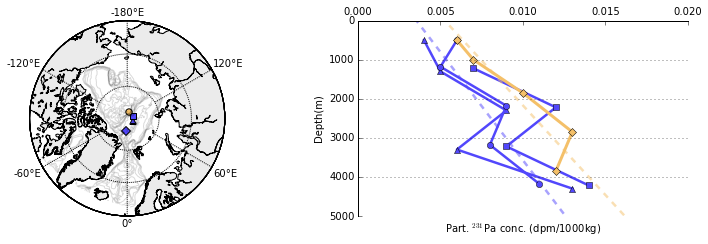

In [207]:
Q= 0.00246

ax = plt.figure(1,figsize=(13,3.5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['blue','blue','red','blue','red','red','yellowgreen']
colors = cm.rainbow(np.linspace(0, 1, 12))
col=[1,1,8,1,8,8,1,8,1,1,\
     3,3,3]

mark=['^','s','o','D','*','H']
i=0
# 1983,1991
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=colors[col[j]],marker=mark[i],s=40,label=name)
    i+=1
        
#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,20.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
#m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.15)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
##============================
err_=[]
x_=[]
y_=[]

for j in ([0,1,3]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa part.']#+data['230Th diss.'];
    err =data['Pa_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2.5,color=colors[col[j]],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
mywls = sm.WLS(x_, y2,weights=1./err_**2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=colors[col[j]],linewidth=2.5,alpha=0.5)

s_=0.00246/mywls.params[0]
print 'Green      :',s_

#conc1=(Q/s_)*np.array([0,5000])+0.004
#plt.plot(conc1,[0, 5000], \
#         '-',c=col[j],linewidth=2.5,alpha=0.5)


##============================
err_=[]
x_=[]
y_=[]

for j in ([2]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values[1:];
    x=data['231Pa part.'][1:]#+data['230Th diss.'];
    err =data['Pa_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    if j<12:
        name= data['name'][0];    
    plt.plot(x,y,'-o',lw=3,color=colors[col[j]],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
#mywls = sm.WLS(x_, y2).fit()
mywls = sm.WLS(x_, y2, weights=1./err_**2).fit()

plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=colors[col[j]],linewidth=2.5,alpha=0.5)

s__=0.00246/mywls.params[0]
print 'Yellow:',s__

spines_to_remove = ['bottom', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')



ax.yaxis.grid()
fig.subplots_adjust(hspace=20)

plt.xlim(0,0.02);plt.ylim(0,5000);plt.gca().invert_yaxis()
plt.xlabel('Part. $^{231}$Pa conc. (dpm/1000kg)');plt.ylabel('Depth(m)');
plt.show()


Green:      k 0.0540611217958 k_1 1.5
Yellow:     k 0.0285898886688 k_1 1.5


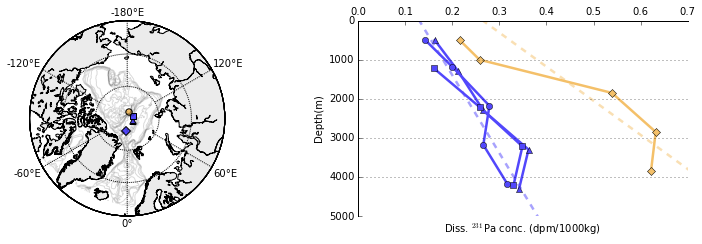

In [187]:
ax = plt.figure(1,figsize=(13,3.5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
i=0
# 1983,1991
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=colors[col[j]],marker=mark[i],s=40,label=name)
    i+=1
        
#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,20.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
#m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.15)


ax = plt.subplot(1,2,2)
#1983,1991
i=0

#===============================================
err_=[]
x_=[]
y_=[]

for j in ([0,1,3]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa diss.']#+data['230Th diss.'];
    err =data['Pa_diss_err']
    xP=data['231Pa part.'][:]
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2.5,color=colors[col[j]],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)

mywls = sm.WLS(x_, y2,weights=1./err_**2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=colors[col[j]],linewidth=2.5,alpha=0.5)

a=mywls.params[0] #slope
b=mywls.params[1] #cons.  
Q= 0.00246
Jvalue_=1.5
Kvalue_=Q/s_*Jvalue_/a



#print analytical solu.
#conc1=Q/Kvalue_+Jvalue_/Kvalue_*((Q/s_)*np.array([0,5000])+0.004)
#plt.plot(conc1,[0, 5000], \
#         '-',c=col[j],linewidth=2.5,alpha=0.5)


print 'Green:      k',Kvalue_,'k_1',Jvalue_
    
#====================================

err_=[]
x_=[]
y_=[]

for j in ([2]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values[2:]
    x=data['231Pa diss.'][2:]#+data['230Th diss.'];
    xP=data['231Pa part.'][2:]
    if j<12:
        err =data['Pa_diss_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    if j<12:
        name= data['name'][0];
    plt.plot(data['231Pa diss.'][1:], data['depth'][1:],
             '-o',lw=2.5,color=colors[col[j]],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)

mywls = sm.WLS(x_, y2,weights=1./err_**2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=colors[col[j]],linewidth=2.5,alpha=0.5)



a=mywls.params[0] #slope
b=mywls.params[1] #cons.     

Kvalue__=Q/s__*Jvalue_/a

print 'Yellow:     k',Kvalue__,'k_1',Jvalue_

spines_to_remove = ['bottom', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')

#print analytical solu.
#conc1=Q/Kvalue__+Jvalue_/Kvalue__*((Q/s__)*np.array([0,5000])+0.004)
#plt.plot(conc1,[0, 5000], \
#         '-',c=col[j],linewidth=2.5,alpha=0.5)
ax.yaxis.grid()
plt.xlim(0,0.7);plt.ylim(0,5000);plt.gca().invert_yaxis()
plt.xlabel('Diss. $^{231}$Pa conc. (dpm/1000kg)');plt.ylabel('Depth(m)');
plt.show()

# Th

In [176]:
nc_filename = sorted(glob.glob('/ocean/xiaoxiny/research/data/total/T*.csv'))
nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
print("found *.csv file: \n{}".format(nc_filename_))



filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*T200201-200712*.nc'))
ptrc=nc.Dataset(filename[0])
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

found *.csv file: 
['/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/1_ref5.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60c.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60c2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60c3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/fi

Yellow     : 528.70788586 176.235961953
Green      : 1041.92703109 347.309010362


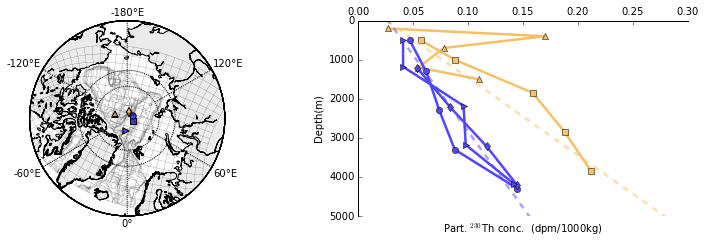

In [177]:
col=['red','red','red','red','red','blue','blue','red','blue','red','red',\
     'yellowgreen','yellowgreen','yellowgreen']
colors = cm.rainbow(np.linspace(0, 1, 12))
col=[8,8,8,8,8,1,1,8,1,8,8,\
     3,3,3]
mark=['^','s','o','d','>','H','D','>']
Q = 0.0267

ax = plt.figure(1,figsize=(13,3.5))

# draw map
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')

i=0
for j in ([0,5,6,7,8]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    if j<12:
        name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=colors[col[j]],marker=mark[i],s=40,label=name)
    i+=1

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)



#read data and fit
ax = plt.subplot(1,2,2)
i=0

#comnine yellow stations
err_=[];x_=[];y_=[]

for j in ([0,7]):
    if j ==0:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[2:];# 2:not to read the data above 500m
        x=data['230Th part.'][2:]
        err =data['Th_part_err'][2:]
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];# 1: same . read data below 500m
        x=data['230Th part.'][1:]
        err =data['Th_part_err'][1:]
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2.5,color=colors[col[j]],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_);x_=np.array(x_);y_=np.array(y_)

#fit and plot
mywls = sm.WLS(x_, y2,weights=1./err_**2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=colors[col[j]],linewidth=2.5,alpha=0.5)

s=0.0267/mywls.params[0]
print 'Yellow     :',s,s/3

#print analytical solu.
#conc1=(Q/s)*np.array([0,5000])+0.03
#plt.plot(conc1,[0, 5000], \
#         '-',c=col[j],linewidth=2.5,alpha=0.5)


##============================
# combine green stations
err_=[];x_=[];y_=[]

for j in ([5,6,8]):
    if j==8:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];
        x=data['230Th part.'][1:]
        err =data['Th_part_err']
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values;
        x=data['230Th part.']
        err =data['Th_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2.5,color=colors[col[j]],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_);x_=np.array(x_);y_=np.array(y_)


#fit and plot
mywls = sm.WLS(x_, y2,weights=1./err_**2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=colors[col[j]],linewidth=2.5,alpha=0.5)

s_=0.0267/mywls.params[0]
print 'Green      :',s_,s_/3

spines_to_remove = ['bottom', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')

#print analytical solu.
#conc1=(Q/s_)*np.array([0,5000])+0.03
#plt.plot(conc1,[0, 5000], \
#         '-',c=col[j],linewidth=2.5,alpha=0.5)


ax.yaxis.grid()

plt.xlim(0,0.3);plt.ylim(0,5000);plt.gca().invert_yaxis();
plt.xlabel('Part. $^{230}$Th conc.  (dpm/1000kg)');plt.ylabel('Depth(m)');
plt.show()

Yellow:      k 0.101437832657 k_1 0.5 Q/k 0.263215402977
Green:     k 0.152916198326 k_1 0.5 Q/k 0.1746054394


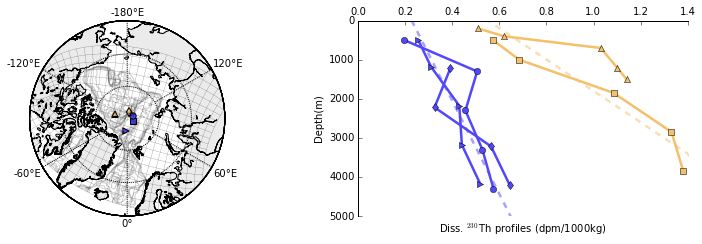

In [171]:
ax = plt.figure(1,figsize=(13,3.5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')

i=0
# 1983,1991
for j in ([0,5,6,7,8]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    if j<12:
        name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=colors[col[j]],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,20.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0

#===============================================

#combine yellow station profiles

err_=[];x_=[];y_=[]


for j in ([0,7]):
    if j ==0:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[2:];
        x=data['230Th diss.'][2:]
        err =data['Th_diss_err'][2:]
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];
        x=data['230Th diss.'][1:]#+data['230Th diss.'];
        err =data['Th_diss_err'][1:]
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2.5,color=colors[col[j]],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_);x_=np.array(x_);y_=np.array(y_)

mywls = sm.WLS(x_, y2,weights=1./err_**2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=colors[col[j]],linewidth=2.5,alpha=0.5)


a=mywls.params[0] #slope
b=mywls.params[1] #cons.  
Q= 0.0267
Jvalue_=0.5#0.3
Kvalue=Q/s*Jvalue_/a

#print analytical solu.
#conc1=Q/Kvalue+Jvalue_/Kvalue*((Q/s)*np.array([0,5000])+0.03)
#plt.plot(conc1,[0, 5000], \
#         '-',c=col[j],linewidth=2.5,alpha=0.5)




print 'Yellow:      k',Kvalue,'k_1',Jvalue_,'Q/k',Q/Kvalue
    
#====================================

#combine green stations

err_=[];x_=[];y_=[]

for j in ([5,6,8]):
    if j==8:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values[1:];
        x=data['230Th diss.'][1:]
        err =data['Th_diss_err']
    else:
        data=pd.read_csv(nc_filename_[j])
        y= data['depth'].values;
        x=data['230Th diss.']#+data['230Th diss.'];
        err =data['Th_diss_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2.5,color=colors[col[j]],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_);x_=np.array(x_);y_=np.array(y_)

# fit and plot
mywls = sm.WLS(x_, y2,weights=1./err_**2).fit()

plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=colors[col[j]],linewidth=2.5,alpha=0.5)

a=mywls.params[0] #slope
b=mywls.params[1] #cons.     

Kvalue_=Q/s_*Jvalue_/a

#print analytical solu.
#conc1=Q/Kvalue_+Jvalue_/Kvalue_*((Q/s_)*np.array([0,5000])+0.03)
#plt.plot(conc1,[0, 5000], \
#         '-',c=col[j],linewidth=2.5,alpha=0.5)

spines_to_remove = ['bottom', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')

print 'Green:     k',Kvalue_,'k_1',Jvalue_,'Q/k',Q/Kvalue_

ax.yaxis.grid()

plt.ylim(0,5000);plt.gca().invert_yaxis()
plt.xlabel('Diss. $^{230}$Th profiles (dpm/1000kg)');plt.ylabel('Depth(m)');
plt.show()

http://blog.olgabotvinnik.com/blog/2013/08/21/2013-08-21-prettyplotlib-painlessly-create-beautiful-matplotlib/

In [463]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.patches as patches
% matplotlib inline

nclist=[        '/ocean/xiaoxiny/research/result_jasper/min_ice/comparison/S_19581968.nc',
        '/ocean/xiaoxiny/research/result_jasper/min_ice/interceptRun/S_W2002-2008.nc']




lon=ptrc.variables['nav_lon'][:,:]
lat=ptrc.variables['nav_lat'][:,:]
dep = ptrc.variables['deptht'][:]


tmask=nc.Dataset(
        '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc')
mbathy=tmask.variables['mbathy'][0,400:,:]
tmask=tmask.variables['tmask'][0,:,400:,:]


bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]



In [464]:
# find cross Canada profile (1)

x=np.array([720-400])
y=np.array([160])
a_=np.zeros([190,1])
b_=np.zeros([190,1])



x=np.array([700-400,590-400,560-400+20])#/2
y=np.array([180,264,340-30])#/2
c=['orange','red','cyan']

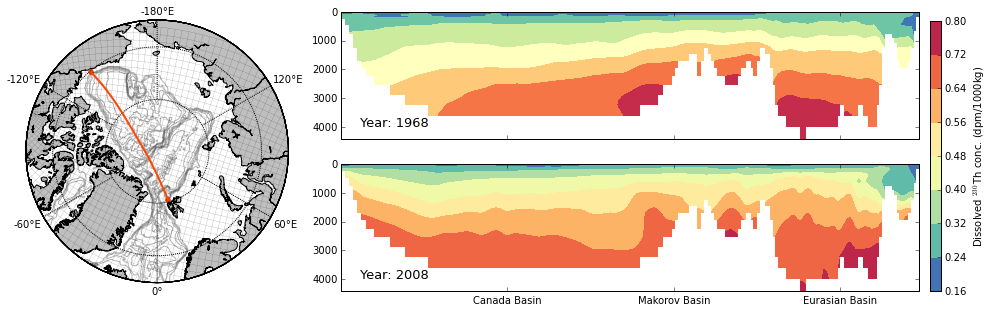

In [469]:
# find cross Canada profile (1)

x=np.array([720-400])
y=np.array([160])
a_=np.zeros([190,1])
b_=np.zeros([190,1])

from matplotlib import gridspec

fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(2, 3)

# 1st plot
ax = fig.add_subplot(gs[0:2,0])

m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round='TRUE')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,80.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
# find cross Canada profile (2)
for j in range (len (y)):
    a=[]
    b=[]
    for i in range (190):
        a.append(x_lon[x[j]-i,y[j]+i])
        b.append(y_lat[x[j]-i,y[j]+i])
    a_[:,j]=a
    b_[:,j]=b
    m.plot(a_[:,j],b_[:,j],color='OrangeRed',linewidth=2)
m.scatter(a_[0],b_[0],color='OrangeRed',s=20)
m.scatter(a_[-1],b_[-1],color='OrangeRed',s=20)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.3)


#Final field
ax1 = fig.add_subplot(gs[0,1:])
data_=np.zeros([50,190,len (y)])
for j in range (len (y)):
    for i in range (190):
        ptrc=nc.Dataset(nclist[0])
        data_[:,i,j]=ptrc.variables['TR_8'][-1,:,x[j]-i,y[j]+i]
data_=np.ma.masked_where(data_<=0,data_)
ax1.contourf(a_[:,j],dep[:-3],data_[:-3,:,0],cmap='Spectral_r');#plt.colorbar(fraction=0.03,pad=0.02)
ax1.text(0.15,0.1, 'Year: 1968', transform=ax1.transAxes, ha='right', fontsize=13)
ax1.set_yticks(np.linspace(0,4000,5))
ax1.invert_yaxis()
plt.xticks(np.arange(a_[:,0].min(), a_[:,0].max(),480000))
ax1.get_xaxis().set_ticklabels([])


#initial field
ax2 = fig.add_subplot(gs[1,1:])
data_=np.zeros([50,190,len (y)])
for j in range (len (y)):
    for i in range (190):
        ptrc=nc.Dataset(nclist[1])
        data_[:,i,j]=ptrc.variables['TR_8'][-1,:,x[j]-i,y[j]+i]
data_ = np.ma.masked_where(data_<=0,data_)
cs = ax2.contourf(a_[:,j],dep[:-3],data_[:-3,:,0],cmap='Spectral_r');
ax2.text(0.15,0.1, 'Year: 2008', transform=ax2.transAxes, ha='right', fontsize=13)
ax2.set_yticks(np.linspace(0,4000,5))
ax2.invert_yaxis()

#change label for the bottom plot
plt.xticks(np.arange(a_[:,0].min(), a_[:,0].max(),480000))
a=ax2.get_xticks().tolist()
a[0]='';a[1]='Canada Basin';a[2]='Makorov Basin';a[3]='Eurasian Basin'
ax2.set_xticklabels(a)

# Make an axis for the colorbar on the right side
cax = fig.add_axes([0.91, 0.125, 0.009, 0.75])
cbar=fig.colorbar(cs, cax=cax)
cbar.set_label('Dissolved $^{230}$Th conc. (dpm/1000kg)')


plt.show()

In [ ]:
# comparison

In [454]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/min_ice/comparison/S_19581968.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))
ptrc=nc.Dataset(nc_filename[0])

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/min_ice/comparison/S_19581968.nc']


In [455]:
monthnum=len(ptrc.variables['TR_7'][:,0,0,0])

In [456]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

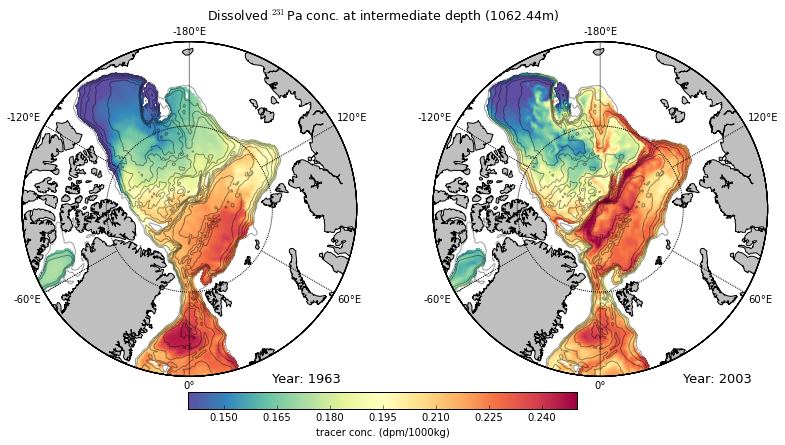

In [484]:
import numpy as np
import matplotlib.pyplot as plt


# Plot each slice as an independent subplot

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13.5,6))
nclist=[        '/ocean/xiaoxiny/research/result_jasper/min_ice/comparison/S_19581968.nc',
        '/ocean/xiaoxiny/research/result_jasper/min_ice/interceptRun/S_W2002-2008.nc']
for ax,time,nc_filename,year in zip(axes.flat,[60,12], nclist,[1963,2003]):
    ptrc=nc.Dataset(nc_filename)
    data =ptrc.variables['TR_7'][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r',vmin=0.14,vmax=0.25); 
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    ax.text(0.95,-0.02, 'Year: %s'%(year), transform=ax.transAxes, ha='right', fontsize=13)

fig.suptitle('Dissolved $^{231}$Pa conc. at intermediate depth (%sm)'%(dep[layer]),fontsize=12.5)
# Make an axis for the colorbar on the right side
cax = fig.add_axes([0.3, 0.05, 0.4, 0.04])
cbar=fig.colorbar(cs, orientation='horizontal',cax=cax)
cbar.set_label('tracer conc. (dpm/1000kg)')

plt.show()

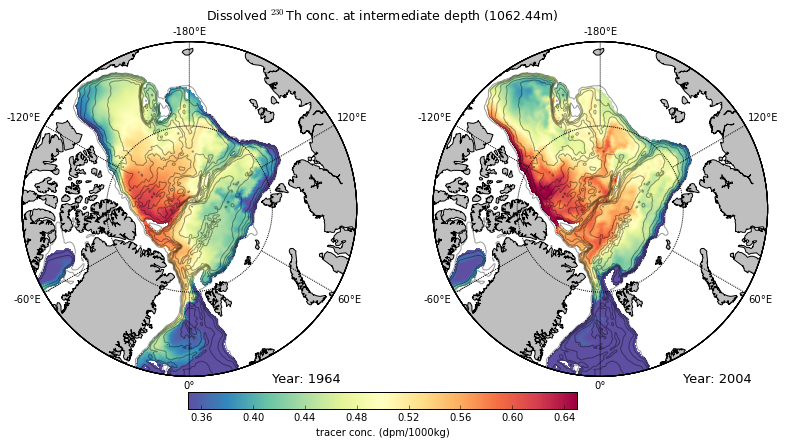

In [485]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13.5,6))
nclist=[        '/ocean/xiaoxiny/research/result_jasper/min_ice/comparison/S_19581968.nc',
        '/ocean/xiaoxiny/research/result_jasper/min_ice/interceptRun/S_W2002-2008.nc']
for ax,time,nc_filename,year in zip(axes.flat,[72,24], nclist,[1964,2004]):
    ptrc=nc.Dataset(nc_filename)
    data =ptrc.variables['TR_8'][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)
    
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    cs=m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='Spectral_r',vmin=0.35,vmax=0.65); 
    m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    ax.text(0.95,-0.02, 'Year: %s'%(year), transform=ax.transAxes, ha='right', fontsize=13)

fig.suptitle('Dissolved $^{230}$Th conc. at intermediate depth (%sm)'%(dep[layer]),fontsize=12.5)
# Make an axis for the colorbar on the right side
cax = fig.add_axes([0.3, 0.05, 0.4, 0.04])
cbar=fig.colorbar(cs, orientation='horizontal',cax=cax)
cbar.set_label('tracer conc. (dpm/1000kg)')

plt.show()